In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
from IPython.display import Image
from qutip import *
import pickle
import time

import sympy
import numpy as np
from sympy import Sum, summation
from sympy.physics.wigner import wigner_3j
import math
import sys

sys.path.append('..')

In [2]:
with open("DC_wm_sim.txt","rb") as fp:
    DC_sim = pickle.load(fp)

In [3]:
rr_scan, sr_scan = [], []
rr_nscan, sr_nscan = [], []

for w0 in range(40,0,-2):
    rr_nscan.append(DC_sim.get('n_rr'+str(w0)))
    sr_nscan.append(DC_sim.get('n_sr'+str(w0)))
    rr_w0, sr_w0 = [], []
    
    for i in range(20):
        rr_w0.append(DC_sim.get('rr'+str(w0))[i][4])
        sr_w0.append(DC_sim.get('sr'+str(w0))[i][4])
        
    rr_scan.append(rr_w0)
    sr_scan.append(sr_w0)

In [4]:
rr_scan = np.array(rr_scan)
sr_scan = np.array(sr_scan)

In [5]:
rr_nscan = np.array(rr_nscan)
sr_nscan = np.array(sr_nscan)

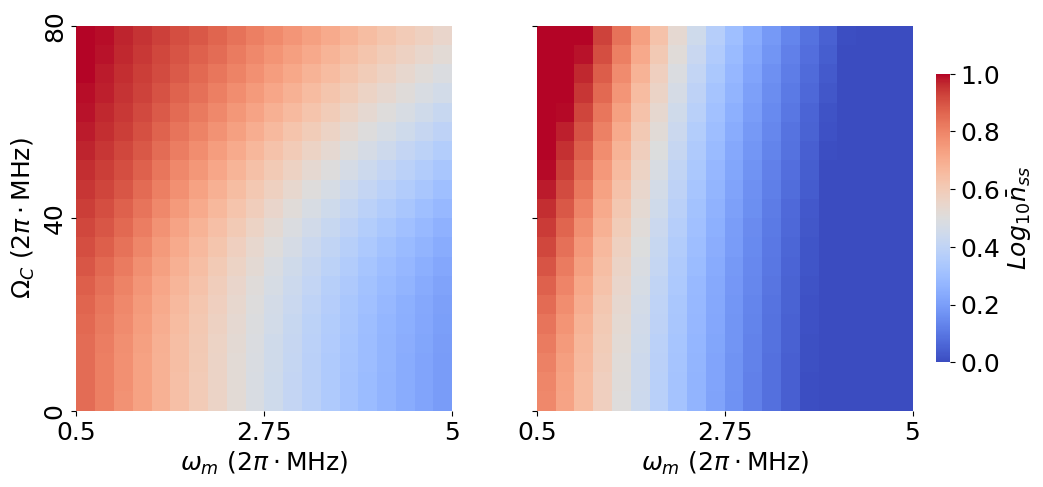

In [6]:
%matplotlib inline
plt.rcParams.update({'font.size':18})
f, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,5), gridspec_kw={'width_ratios': [0.8, 1]})
ax1, ax2 = ax.flatten()

sns.heatmap(np.log(rr_nscan)/np.log(10), vmin=0, vmax=1, cmap= "coolwarm", cbar=False, ax=ax1)
ax1.set_ylabel(r'$\Omega_C$ (2$\pi \cdot $MHz)')

sns.heatmap(np.log(sr_nscan)/np.log(10), vmin=0, vmax=1, cmap= "coolwarm", cbar_kws={"shrink": .75, 'label': r'$Log_{10}\bar{n}_{ss}$'}, ax=ax2)

ax1.set_xlabel(r'$\omega_m$ (2$\pi \cdot $MHz)')
ax2.set_xlabel(r'$\omega_m$ (2$\pi \cdot $MHz)')

ax1.set_yticks([0,10,20],[80, 40, 0])
ax1.set_xticks([0,10,20],[0.5,2.75, 5])